In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('../data/raw/ec2_cpu_utilization_5f5533.csv')
df.head()

,timestamp,value
0,2014-02-14 14:27:00,51.846
1,2014-02-14 14:32:00,44.508
2,2014-02-14 14:37:00,41.244
3,2014-02-14 14:42:00,48.568
4,2014-02-14 14:47:00,46.714


In [21]:
df.shape

(4032, 2)

In [37]:
df = df.set_index('timestamp')

df.index = pd.to_datetime(df.index)

df.describe()

,value,day,hour,minute
count,4032.000000,4032.000000,4032.000000,4032.000000
mean,43.110372,21.100694,11.500000,29.500000
std,4.303565,4.061275,6.923045,17.262403
min,34.766000,14.000000,0.000000,2.000000
25%,39.296000,18.000000,5.750000,15.750000
50%,42.918000,21.000000,11.500000,29.500000
75%,46.006000,25.000000,17.250000,43.250000
max,68.092000,28.000000,23.000000,57.000000


In [38]:
min_date = df.index.min()
max_date = df.index.max()
print(f"Data from {min_date} to {max_date}")

Data from 2014-02-14 14:27:00 to 2014-02-28 14:22:00


In [39]:
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df.reset_index(inplace=True)
df['day_str'] = df['timestamp'].dt.strftime('%a')
df['hour-min'] = df['timestamp'].dt.strftime('%H:%M')
df['hour-weekday'] = df['timestamp'].dt.strftime('%H-%a')
df.set_index('timestamp', inplace=True)

In [41]:
df.head()

,value,day,hour,minute,day_str,hour-min,hour-weekday
timestamp,,,,,,,
2014-02-14 14:27:00,51.846,14,14,27,Fri,14:27,14-Fri
2014-02-14 14:32:00,44.508,14,14,32,Fri,14:32,14-Fri
2014-02-14 14:37:00,41.244,14,14,37,Fri,14:37,14-Fri
2014-02-14 14:42:00,48.568,14,14,42,Fri,14:42,14-Fri
2014-02-14 14:47:00,46.714,14,14,47,Fri,14:47,14-Fri


### Daily Consumption

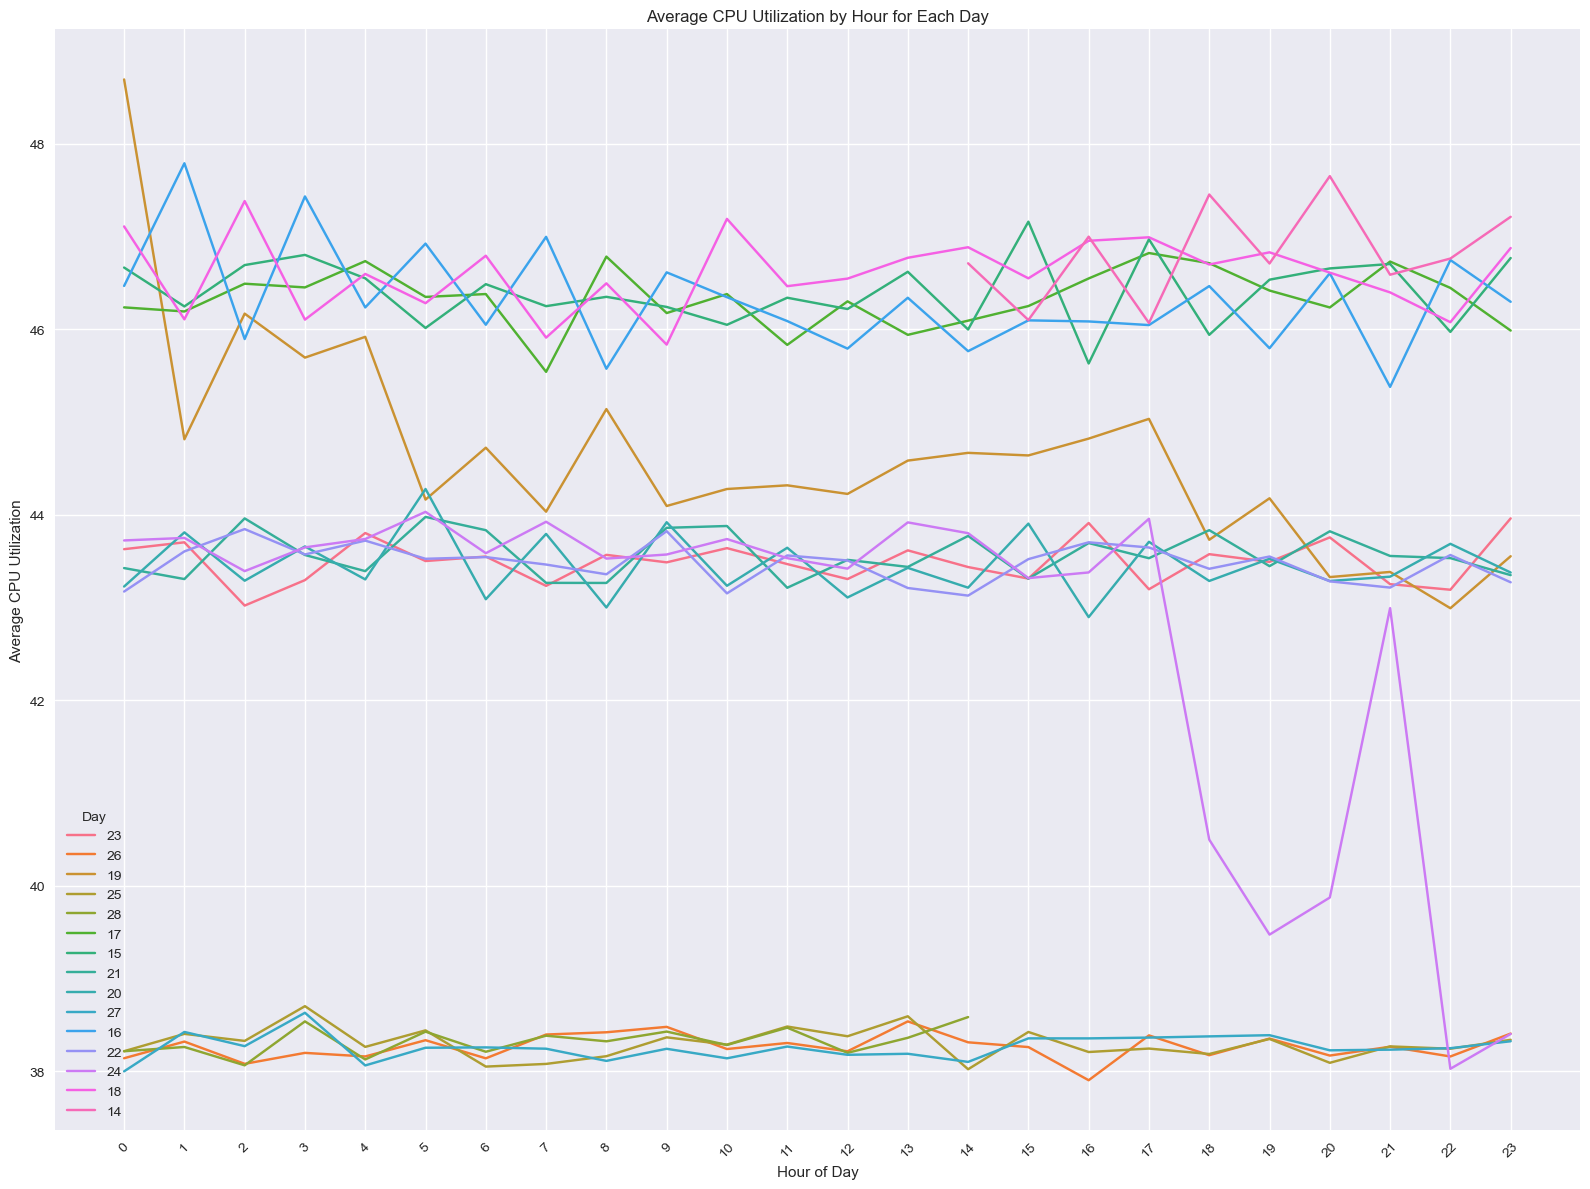

In [70]:
df_plot = df[['day','day_str', 'value', 'hour']].dropna()
df_plot = df_plot.groupby(['day','day_str', 'hour']).mean()[["value"]].reset_index()
df_plot = df_plot.sort_values(by=['hour'], ascending = True)

days = df_plot['day'].unique()
colors = sns.color_palette("husl", len(days))

plt.figure(figsize=(16,12))
for i, day in enumerate(days):
    data = df_plot[df_plot['day'] == day]
    plt.plot(data['hour'], data['value'], label=f'{day}', color=colors[i])
    #plt.text(len(data['hour']) - 1, data['value'].iloc[-1], str(day), fontsize=12, color=colors[i])

plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)], rotation=45)
plt.xlabel('Hour of Day')
plt.ylabel('Average CPU Utilization')
plt.title('Average CPU Utilization by Hour for Each Day')
plt.legend(title = "Day")
plt.tight_layout()
plt.show()

C:\Users\manhh\AppData\Local\Temp\ipykernel_10228\3871112551.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(hours)).colors


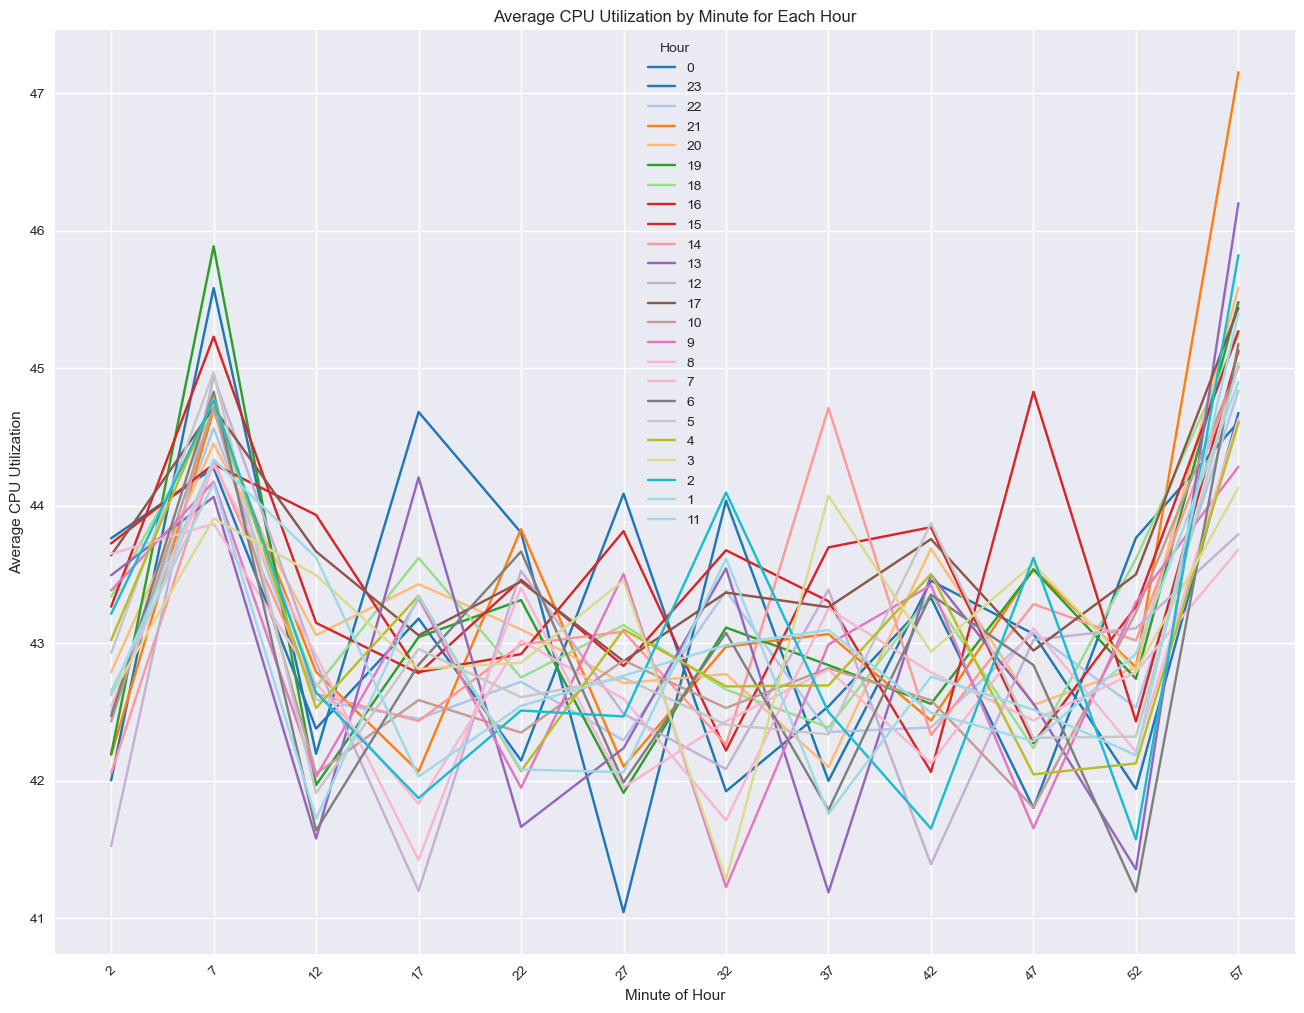

In [ ]:
df_plot = df[['minute', 'value', 'hour']].dropna()
df_plot = df_plot.groupby(['minute', 'hour']).mean()[["value"]].reset_index()
df_plot = df_plot.sort_values(by=['minute'], ascending = True)

hours = df_plot['hour'].unique()
colors = plt.cm.get_cmap('tab20', len(hours)).colors

plt.figure(figsize=(16,12))
for i, hour in enumerate(hours):
    data = df_plot[df_plot['hour'] == hour]
    plt.plot(data['minute'], data['value'], label=f'{hour}', color=colors[i])
    #plt.text(len(data['hour']) - 1, data['value'].iloc[-1], str(day), fontsize=12, color=colors[i])

minutes_unique = df_plot['minute'].unique()
plt.xlabel('Minute of Hour')
plt.xticks(ticks= minutes_unique,labels = minutes_unique,rotation=45)
plt.ylabel('Average CPU Utilization')
plt.title('Average CPU Utilization by Minute for Each Hour')
plt.legend(title = "Hour")
plt.show()

**Key insights**
- Daily Avg: Các giá trị trong cùng 1 ngày tương tự nhau, CPU utilization ổn định hàng ngày, không có pattern daily rõ ràng
- Hourly Avg: Các giá trị biến động từ phút 12 - 52, thường tăng ở giai đoạn đầu và lại tăng lên trong 5 phút cuối.

## Box plot

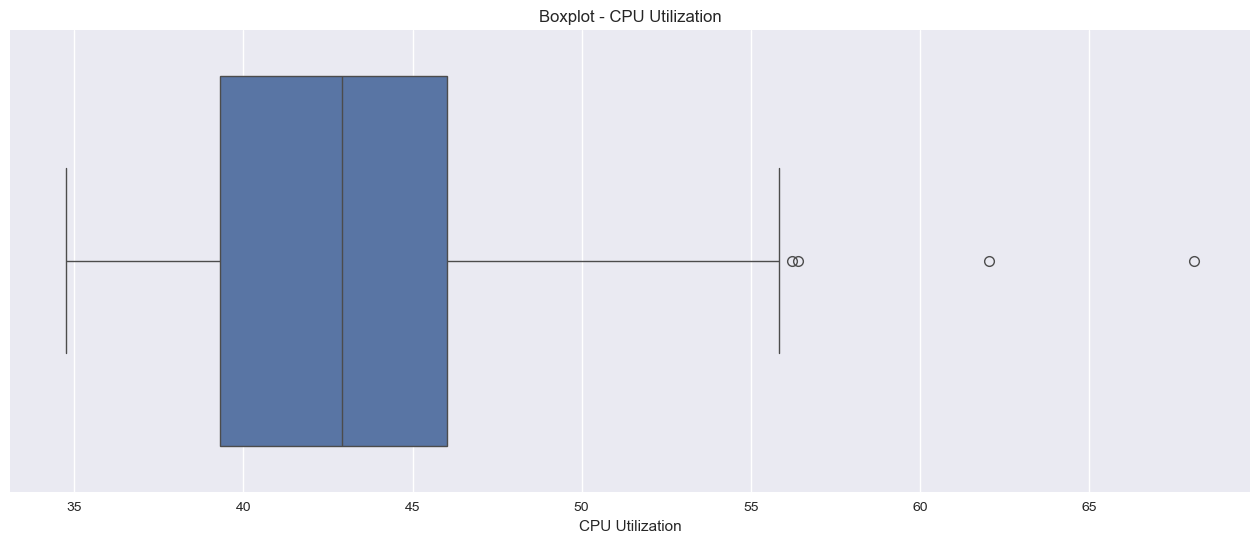

In [74]:
plt.figure(figsize=(16,6))
sns.boxplot(data = df, x='value')
plt.xlabel('CPU Utilization')
plt.title(f'Boxplot - CPU Utilization');

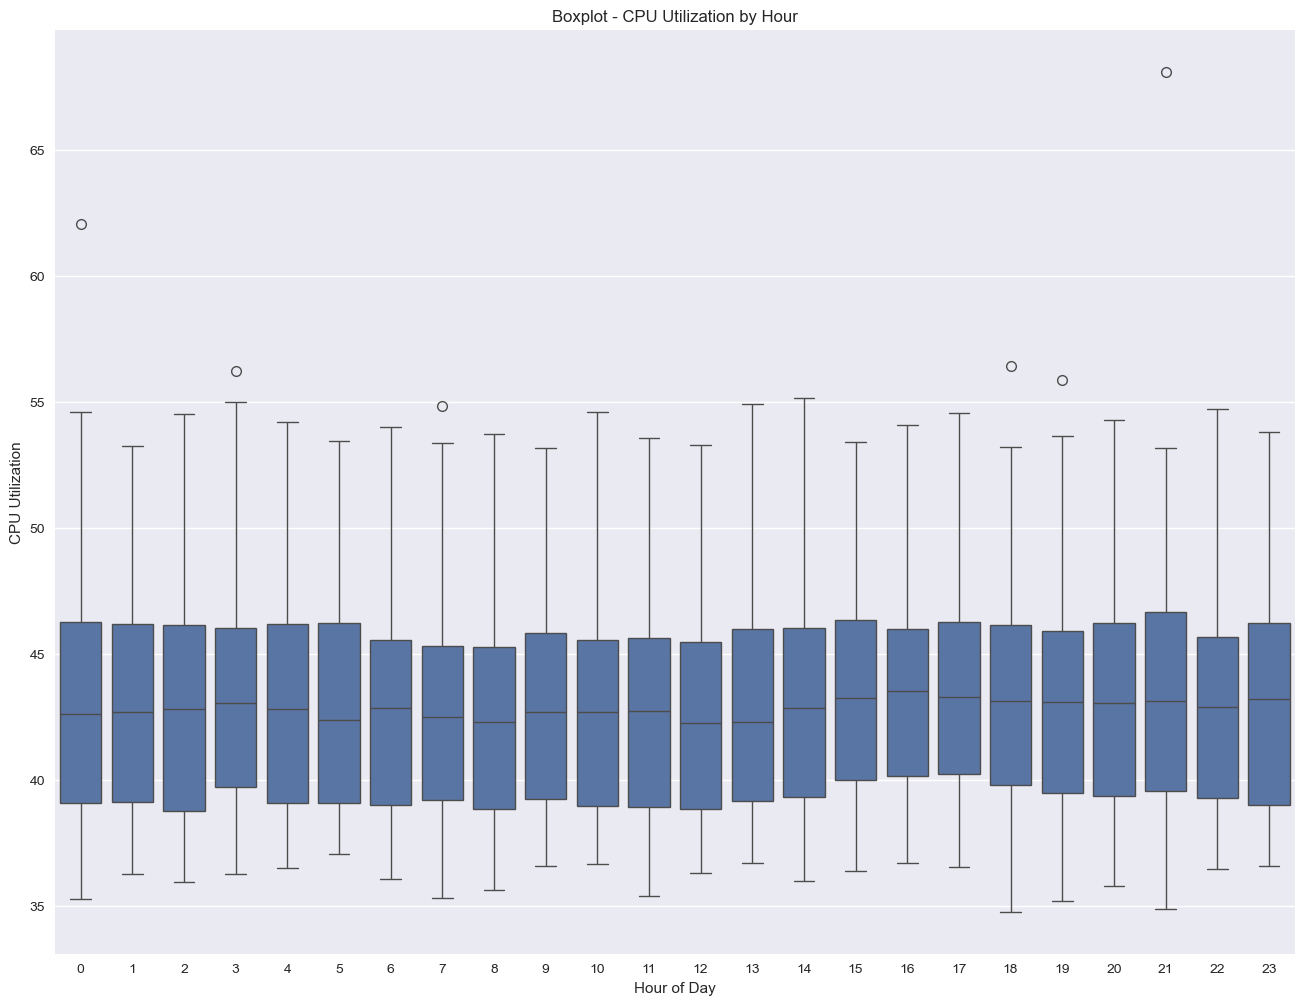

In [79]:
df_plot = df[['hour', 'value', 'day']].sort_values(by='hour')

plt.figure(figsize=(16,12))
sns.boxplot(data = df_plot, x='hour', y='value')
plt.title('Boxplot - CPU Utilization by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('CPU Utilization')
plt.show()

## Decomposition

                      value  day  hour  minute day_str hour-min hour-weekday  \
timestamp                                                                      
2014-02-15 01:02:00  46.738   15     1       2     Sat    01:02       01-Sat   
2014-02-15 01:07:00  43.076   15     1       7     Sat    01:07       01-Sat   
2014-02-15 01:12:00  51.710   15     1      12     Sat    01:12       01-Sat   
2014-02-15 01:17:00  44.564   15     1      17     Sat    01:17       01-Sat   
2014-02-15 01:22:00  42.888   15     1      22     Sat    01:22       01-Sat   
...                     ...  ...   ...     ...     ...      ...          ...   
2014-02-28 01:37:00  37.906   28     1      37     Fri    01:37       01-Fri   
2014-02-28 01:42:00  38.686   28     1      42     Fri    01:42       01-Fri   
2014-02-28 01:47:00  37.794   28     1      47     Fri    01:47       01-Fri   
2014-02-28 01:52:00  38.710   28     1      52     Fri    01:52       01-Fri   
2014-02-28 01:57:00  39.126   28     1  

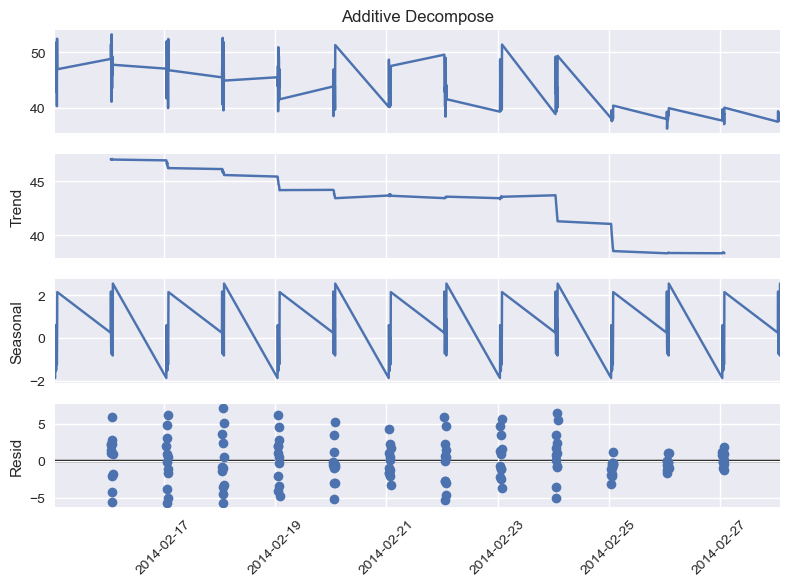

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_plot = df[df['hour'] == 1].reset_index()
df_plot = df_plot.set_index('timestamp')

df_plot['Multiplicative Decompose'] = df_plot['value']
df_plot['Additive Decompose'] = df_plot['value']
print(df_plot)
result_add = seasonal_decompose(df_plot['Additive Decompose'], model='additive', period=24)
result_mul = seasonal_decompose(df_plot['Multiplicative Decompose'], model='multiplicative', period=24)

result_add.plot()

plt.xticks(rotation=45)
plt.show()